In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pickle

In [2]:
# Read the diabetes dataset
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check the dataset information
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Based on the dataset information, the dataset didn't have any missing values

In [4]:
# Number of duplicated data
diabetes.duplicated().sum()

0

## Exploratory Data Analysis

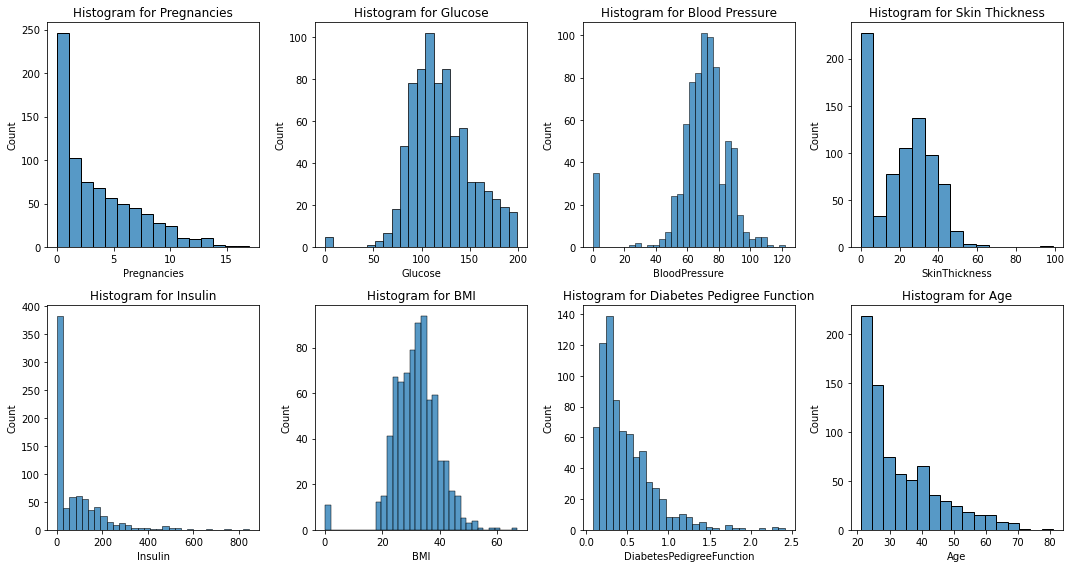

In [5]:
fig, axs = plt.subplots(2, 4, figsize=(15, 8))

# Plot the histplot for 'pregnancies' in the first subplot (index 0, 0)
sns.histplot(data=diabetes, x='Pregnancies', ax=axs[0, 0])
axs[0, 0].set_title('Histogram for Pregnancies')

# Plot the histplot for 'glucose' in the second subplot (index 0, 1)
sns.histplot(data=diabetes, x='Glucose', ax=axs[0, 1])
axs[0, 1].set_title('Histogram for Glucose')

# Plot the histplot for 'blood pressure' in the third subplot (index 1, 0)
sns.histplot(data=diabetes, x='BloodPressure', ax=axs[0, 2])
axs[0, 2].set_title('Histogram for Blood Pressure')

# Plot the histplot for 'skin thickness' (assuming it's meant to be another variable) in the fourth subplot (index 1, 1)
sns.histplot(data=diabetes, x='SkinThickness', ax=axs[0, 3])
axs[0, 3].set_title('Histogram for Skin Thickness')

# Plot the histplot for 'insulin' in the first subplot (index 0, 0)
sns.histplot(data=diabetes, x='Insulin', ax=axs[1, 0])
axs[1, 0].set_title('Histogram for Insulin')

# Plot the histplot for 'BMI' in the second subplot (index 0, 1)
sns.histplot(data=diabetes, x='BMI', ax=axs[1, 1])
axs[1, 1].set_title('Histogram for BMI')

# Plot the histplot for 'diabetes pedigree function' in the third subplot (index 1, 0)
sns.histplot(data=diabetes, x='DiabetesPedigreeFunction', ax=axs[1, 2])
axs[1, 2].set_title('Histogram for Diabetes Pedigree Function')

# Plot the histplot for 'Pupuk' (assuming it's meant to be another variable) in the fourth subplot (index 1, 1)
sns.histplot(data=diabetes, x='Age', ax=axs[1, 3])
axs[1, 3].set_title('Histogram for Age')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


In [7]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


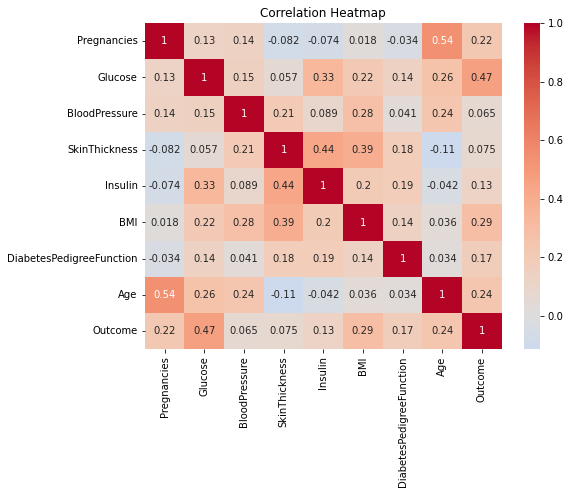

In [8]:
# Calculate the correlation matrix
corr_matrix = diabetes.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

## Data Splitting

In [9]:
# Seprating the data and labels 
X = diabetes.drop('Outcome',axis=1)
y = diabetes['Outcome']

In [10]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Feature Engineering

In [11]:
# Feature standardization
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

## Model Building 

In [12]:
# K-Nearest Neighbors 
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_scaled, y_train)
y_pred_knn = neigh.predict(x_test_scaled)

In [13]:
# Support Vector Machine
svc_model = svm.SVC(decision_function_shape='ovo')
svc_model.fit(x_train_scaled, y_train)
y_pred_svc = svc_model.predict(x_test_scaled)

In [14]:
# Logistic Regression
LogRegr = LogisticRegression(random_state=0).fit(x_train_scaled, y_train)
y_pred_LogRegr = LogRegr.predict(x_test_scaled)

## Model Evaluation

In [17]:
def model_evaluation(test):
    knn_accuracy = accuracy_score(test, y_pred_knn)
    svc_accuracy = accuracy_score(test, y_pred_svc)
    LogRegr_accuracy = accuracy_score(test, y_pred_LogRegr)
    model_eval = {
        "Model" : ['KNN','SVC','Logistic Regression'],
        "Accuracy" : [knn_accuracy,svc_accuracy,LogRegr_accuracy],
        }
    df_eval = pd.DataFrame(model_eval)
    return df_eval.sort_values(by='Accuracy',ascending=False)

In [18]:
model_evaluation(y_test)

,Model,Accuracy
2,Logistic Regression,0.766234
0,KNN,0.759740
1,SVC,0.746753


In [19]:
# Export the trained model
with open('model.pkl', 'wb') as f:
    pickle.dump(LogRegr, f)